In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define file path inside Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/DataSets/heart.csv"

# Load the dataset
df= pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Handle missing values
df.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
from sklearn.model_selection import train_test_split
# Define features and target variable
X = df.drop(columns=['target'])   # Replace 'target' with actual target column name
y = df['target']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
from sklearn.svm import SVC
# Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)


In [ ]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score,
    confusion_matrix
)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_linear)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred_linear)
print(f"R-squared: {r2}")
accuracy = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy: {accuracy}")
cm=confusion_matrix(y_test, y_pred_linear)
print("Confusion Matrix")
print(cm)

Mean Squared Error: 0.18536585365853658
R-squared: 0.25851894155720523
Accuracy: 0.8146341463414634
Confusion Matrix
[[72 30]
 [ 8 95]]


In [ ]:
# Train SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)


In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_poly)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred_poly)
print(f"R-squared: {r2}")
accuracy = accuracy_score(y_test, y_pred_poly)
print(f"Accuracy: {accuracy}")
cm=confusion_matrix(y_test, y_pred_poly)
print("Confusion Matrix:")
print(cm)

Mean Squared Error: 0.09268292682926829
R-squared: 0.6292594707786026
Accuracy: 0.9073170731707317
Confusion Matrix:
[[ 85  17]
 [  2 101]]


In [ ]:
# Train SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_rbf)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred_rbf)
print(f"R-squared: {r2}")
accuracy = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy: {accuracy}")
cm=confusion_matrix(y_test, y_pred_rbf)
print("Confusion Matrix:")
print(cm)


Mean Squared Error: 0.11219512195121951
R-squared: 0.5512088330477821
Accuracy: 0.8878048780487805
Confusion Matrix:
[[85 17]
 [ 6 97]]


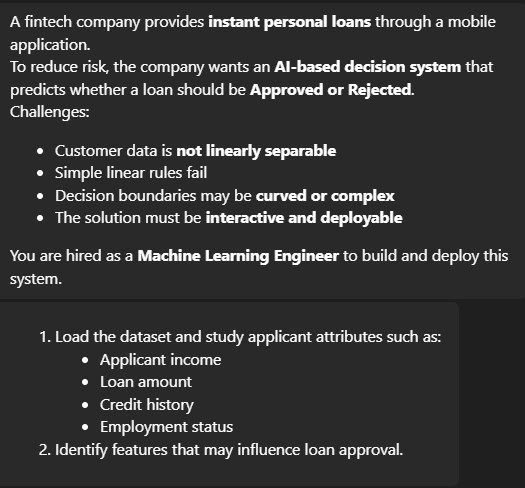
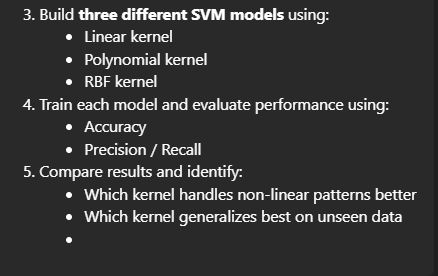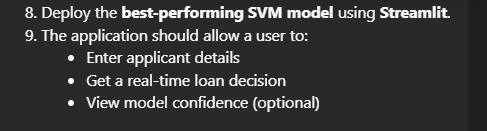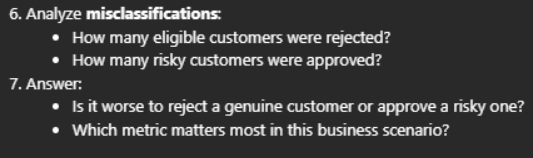

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define file path inside Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/DataSets/train_svm.csv"

# Load the dataset
df= pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
#Q1. Load the dataset and study applicant attributes


df[['ApplicantIncome', 'LoanAmount', 'Credit_History', 'Self_Employed']].describe()

,ApplicantIncome,LoanAmount,Credit_History
count,614.000000,592.000000,564.000000
mean,5403.459283,146.412162,0.842199
std,6109.041673,85.587325,0.364878
min,150.000000,9.000000,0.000000
25%,2877.500000,100.000000,1.000000
50%,3812.500000,128.000000,1.000000
75%,5795.000000,168.000000,1.000000
max,81000.000000,700.000000,1.000000


In [ ]:
#Q2. Identify features that may influence loan approval
df.groupby('Loan_Status')[['ApplicantIncome','LoanAmount','Credit_History']].mean()


,ApplicantIncome,LoanAmount,Credit_History
Loan_Status,,,
N,5446.078125,151.220994,0.541899
Y,5384.068720,144.294404,0.981818


In [ ]:
#Q3. Build three SVM models (Linear, Polynomial, RBF)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

df = df.dropna().drop_duplicates()

for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_linear = SVC(kernel='linear')
svm_poly   = SVC(kernel='poly', degree=3)
svm_rbf    = SVC(kernel='rbf')

In [ ]:
#Q4. Train models & evaluate (Accuracy, Precision, Recall)
from sklearn.metrics import accuracy_score, precision_score, recall_score

models = {
    "Linear": svm_linear,
    "Polynomial": svm_poly,
    "RBF": svm_rbf
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred)
    ]

pd.DataFrame(results, index=['Accuracy','Precision','Recall']).T

,Accuracy,Precision,Recall
Linear,0.822917,0.800000,1.000000
Polynomial,0.802083,0.788235,0.985294
RBF,0.812500,0.797619,0.985294


In [ ]:
#Q5. Identify best kernel
pd.DataFrame(results, index=['Accuracy','Precision','Recall']).T.sort_values('Accuracy', ascending=False)


,Accuracy,Precision,Recall
Linear,0.822917,0.800000,1.000000
RBF,0.812500,0.797619,0.985294
Polynomial,0.802083,0.788235,0.985294


In [ ]:
#Q6. Analyze misclassifications
from sklearn.metrics import confusion_matrix

best_model = svm_rbf
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

eligible_rejected = cm[1][0]   # False Negative
risky_approved = cm[0][1]      # False Positive

eligible_rejected, risky_approved

(np.int64(1), np.int64(17))

In [ ]:
#Q7. Business metric conclusion
print("Rejecting genuine customers =", eligible_rejected)
print("Approving risky customers =", risky_approved)
print("Most important metric: Recall (reduce risky approvals)")

Rejecting genuine customers = 1
Approving risky customers = 17
Most important metric: Recall (reduce risky approvals)
